In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
# install statsmodels
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 9.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2022-01-04 06:33:28--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  59.6MB/s    in 0.4s    

2022-01-04 06:33:28 (59.6 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [6]:
# cek file
!head sp500sub.csv

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.079999923706056,10.15999984741211,10.15999984741211,2889600.0,INCY

In [7]:
# buat dataframe
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [8]:
# tampil 5 data teratas
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [13]:
# buat variable dengan nama goog
goog = df[df['Name'] == 'GOOG'][['Close']].copy() # => artinya copy kolom "close", yang "name=goog" 

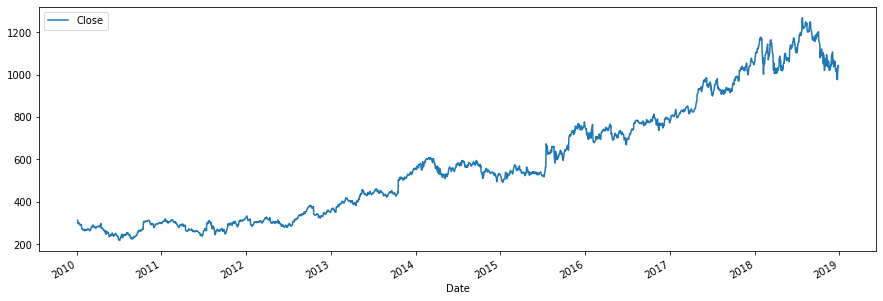

In [14]:
# buat plot
goog.plot(figsize=(15, 5));

In [15]:
# buat kolom baru
goog['LogClose'] = np.log(goog['Close']) # => akan diisi dengan nilai log dari "close"

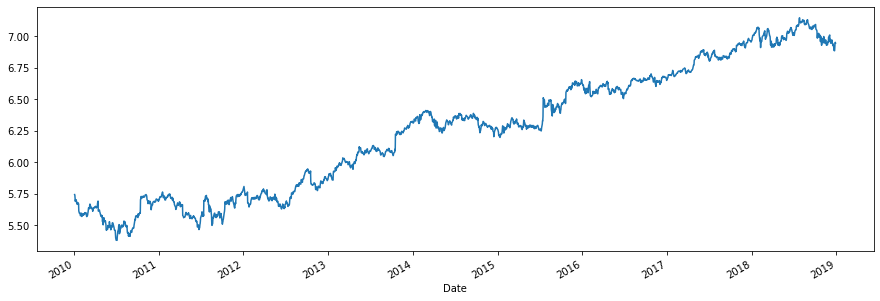

In [16]:
# buat plot
goog['LogClose'].plot(figsize=(15, 5));

In [17]:
# goog.index.freq = 'B'

In [28]:
# buat data train dan data testing
Ntest = 30
train = goog.iloc[:-Ntest] # => selain tail dibawah
test = goog.iloc[-Ntest:] # => sama kaya goog.tail(30)

In [29]:
# Ubah data menjadi boolean
# goog.index adalah semua data
# train.index[-1] adalah data terakhir dari "train"
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [42]:
# import statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
hw = ExponentialSmoothing(train['LogClose'],initialization_method='legacy-heuristic',trend='add', seasonal=None)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [46]:
# fit untuk data training
goog.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [47]:
# forecast untuk data testing
goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


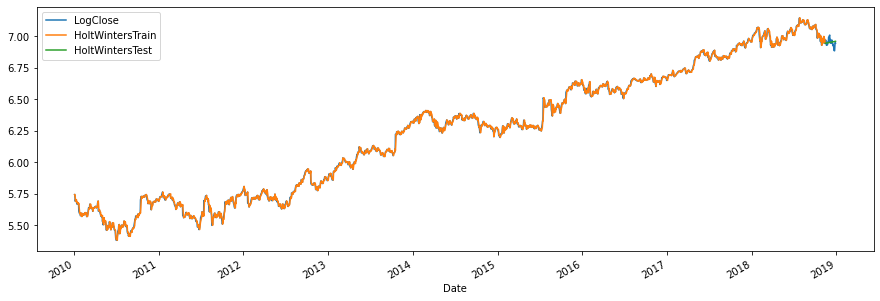

In [48]:
# buat plot
goog[['LogClose', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 5));

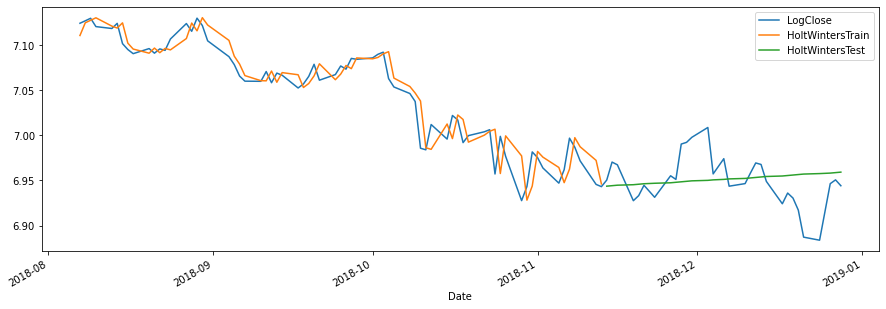

In [49]:
# buat plot dengan menggunakan variable
cols = ['LogClose', 'HoltWintersTrain', 'HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15, 5));

In [54]:
# buat kolom baru pada variable goog
goog.loc[test_idx, 'Naive'] = train.iloc[-1]['LogClose']

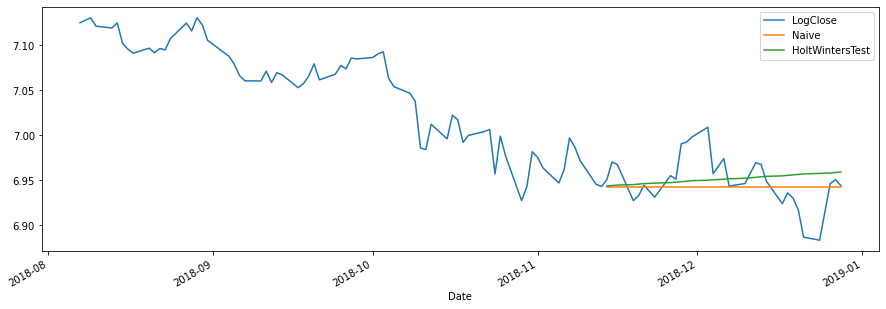

In [55]:
goog.iloc[-100:][['LogClose', 'Naive', 'HoltWintersTest']].plot(figsize=(15, 5));

In [56]:
r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'Naive'])

-0.06454209862026317

In [57]:
r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'HoltWintersTest'])

-0.15876524672340087